# The Sparks Foundation-GRIP-Data Science & Business Analytics-November-2021

## Task 2 ==> prediction using unsupervised ML

## Author : AMAR RAMESH BHADE

 
### import all required libraries

In [122]:
import numpy as np

In [123]:
import seaborn as sns

In [124]:
import pandas as pd

In [125]:
from matplotlib import pyplot as plt

In [126]:
# for ignore warnings 
import warnings as warn
warn.filterwarnings("ignore")

### reading dataset

In [127]:
# reading data from iris dataset
iris_data=pd.read_csv("Iris .csv")

In [128]:
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [129]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### no. of rows and columns

In [130]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [131]:
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [132]:
iris_data.shape

(150, 6)

#### statistical discription

In [133]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


####  checking null values

In [134]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [135]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## data visualization

## 1.boxplot

In [136]:
iris=iris_data.drop("Id",axis=1)

<AxesSubplot:>

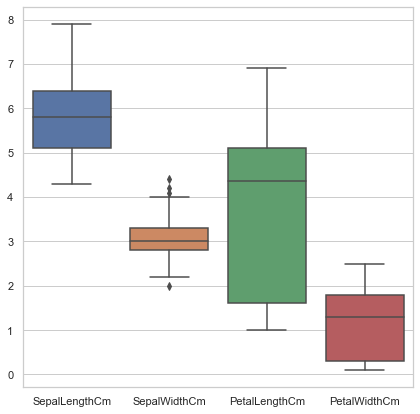

In [137]:
plt.figure(figsize=(7,7))
sns.set(style="whitegrid")
sns.boxplot(data=iris)

## 2.heatmap

In [138]:
iris_data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

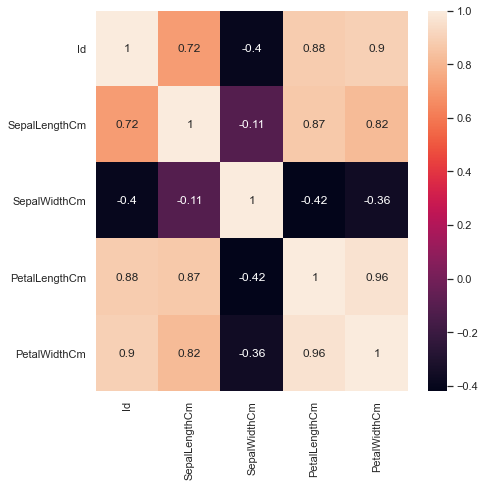

In [139]:
plt.figure(figsize=(7,7))
sns.heatmap(iris_data.corr(),annot=True)


### > finding the optimum number of cluster by applying k mean clustring on data

#### import required library

In [140]:
from sklearn.cluster import KMeans

In [141]:
# for unsupervised learning we drop the label columns
iris=pd.DataFrame(iris_data)
iris_df=iris_data.drop(columns=["Species","Id"])

In [142]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### their various methods to finding optimum number of cluster like Silhouette Coefficient and elbow method

#### here we use elbow method

In [143]:
# use within-cluster sum of squre(wcss)

wcss=[]
clusters_range=range(1,13)

for i in clusters_range:
    kmeans=KMeans(n_clusters=i,init="k-means++",n_init=10)
    kmeans=kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)
    print(i,kmeans.inertia_)

1 680.8243999999996
2 152.36870647733915
3 78.94084142614601
4 57.317873214285726
5 46.55057267267267
6 38.930963049671746
7 34.190687924796634
8 30.001881875582672
9 27.963035714285727
10 26.262424470266577
11 24.430752705627715
12 22.896591353091356


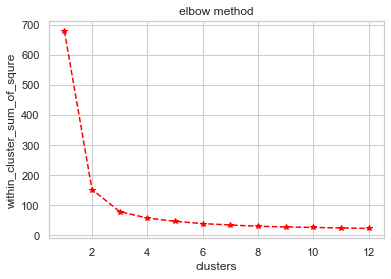

In [144]:
plt.plot(clusters_range,wcss,"*--",color="red")
plt.grid(True)
plt.title("elbow method")
plt.xlabel("clusters")
plt.ylabel("within_cluster_sum_of_squre")
plt.show()


In [145]:
kmeans=KMeans(n_clusters=3,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)

In [146]:
prediction = kmeans.fit_predict(iris_df) 

In [147]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### visualizing the culsters

In [148]:
x=iris_df.iloc[:,[0,1,2,3]].values

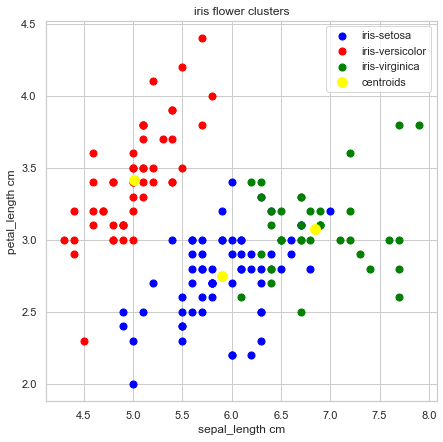

In [149]:
plt.figure(figsize=(7,7))
plt.scatter(x[prediction==0,0],x[prediction==0,1],s=50,c="blue",label="iris-setosa")
plt.scatter(x[prediction==1,0],x[prediction==1,1],s=50,c="red",label="iris-versicolor")
plt.scatter(x[prediction==2,0],x[prediction==2,1],s=50,c="green",label="iris-virginica")

# ploting the clusters centers
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="yellow",label ="centroids")
plt.title("iris flower clusters")
plt.xlabel("sepal_length cm")
plt.ylabel("petal_length cm")
plt.legend()
plt.show()
